# **1. Introduction**

## a) Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## b) Load data

In [ ]:
file_path = r'/content/drive/MyDrive/weightheight (1).csv'
df = pd.read_csv(file_path)

In [ ]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [ ]:
df.tail(3)

,Gender,Height,Weight
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


# **2. Basic Characteristics**

In [ ]:
df.info() # check the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
df.describe() # Basic features of the data

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
df.isna().sum() # to check missing values

,0
Gender,0
Height,0
Weight,0


# **3. Hypothesis Testing**

**Null Hypothesis (H₀)**


$H_0$ : There is no significant relationship between height and weight.

**Alternative Hypothesis (H₁)**

$H_1$ : There is a significant relationship between height and weight

**Significance Level (α)**

 α  = 0.05

## **Normality Test**

### i) Shapiro Wik Test


In [ ]:
#Test normality of the data using Shapiro
from scipy import stats as stats
height_of_ind = df['Height']
weight_of_ind = df['Weight']

# Shapiro Wik Test
height = stats.shapiro(height_of_ind )
weight = stats.shapiro(weight_of_ind)
print(f'Shapiro Wik Test for height: {height}\nShapiro Wik Test for Weight : {weight}')

Shapiro Wik Test for height: ShapiroResult(statistic=0.9960623238931016, pvalue=8.162481039405506e-16)
Shapiro Wik Test for Weight : ShapiroResult(statistic=0.9862472142251519, pvalue=5.557950841845519e-30)


In [ ]:
#p_value test
8.162481039405506e-16 < 0.05 and 5.557950841845519e-30 < 0.05

True

**Normality interpretation**


The Shapiro test for both height and weight are 0.996 and 0.98624 respectively. They are closer to 1 indicating that the data is normally distributed.

**Hypothesis Intepretation**

The p_values for both height and weight are below the significance level of 0.05.


Therefore, we reject the null hypothesis that states that, 'There is no significant relationship between height and weight'

### ii) Histogram with a normal curve overlay(kde)

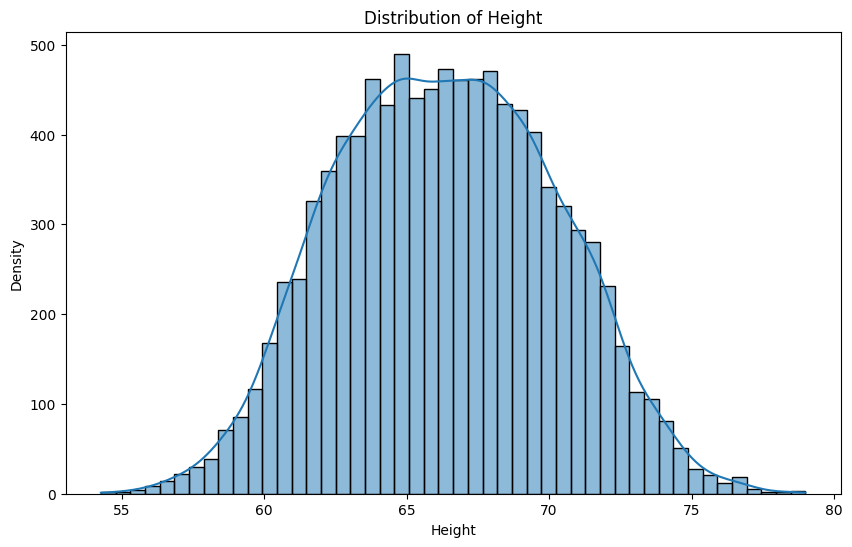

In [ ]:
#Height
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Height', kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()


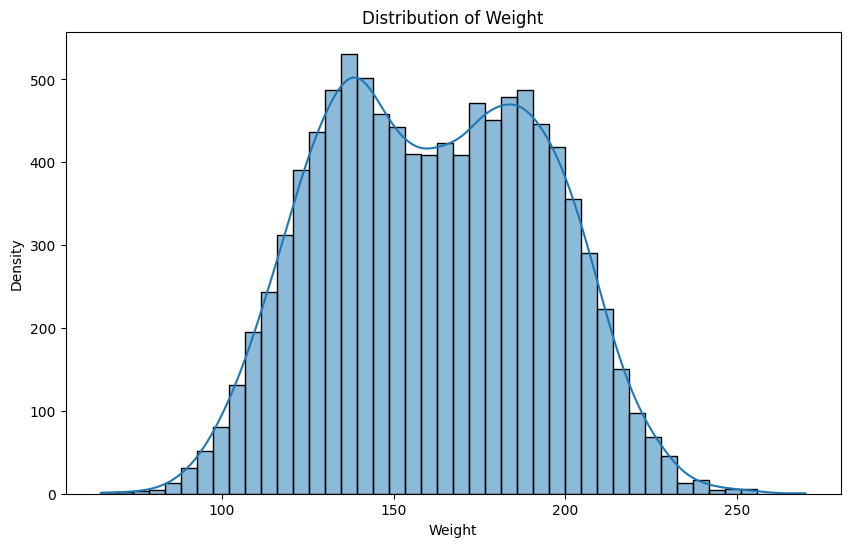

In [ ]:
# Weight

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight', kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()


**Histogram with a normal curve overlay Intepretation**


From the above diagrams, they confirm the Shapiro Wik Test that the data is normally distributed

# **4. Correlation Analysis**

## a)Heatmap

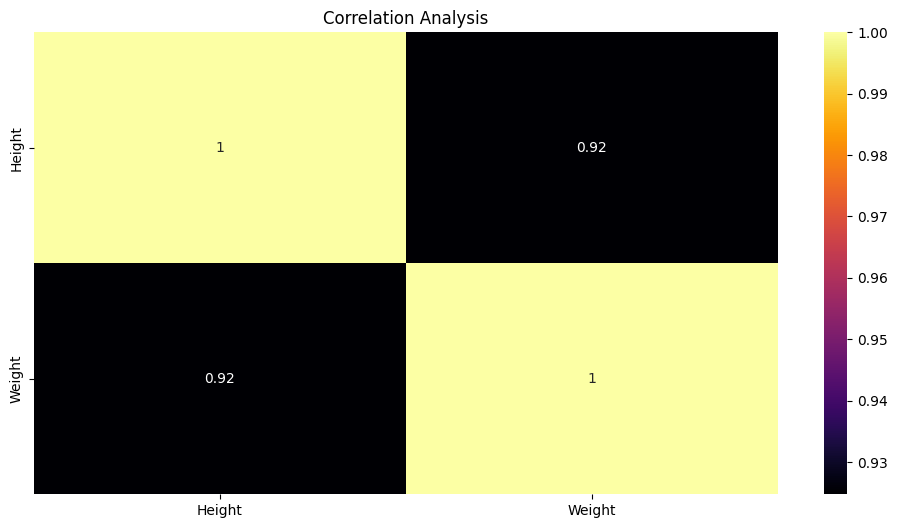

In [ ]:
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr(method='pearson')
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Analysis')
plt.show()

**Interpretation:**


The heatmap indicates that height and weight have a strong positive relationship, as shown by the high correlation of 0.92.

## b)Scatter Plot

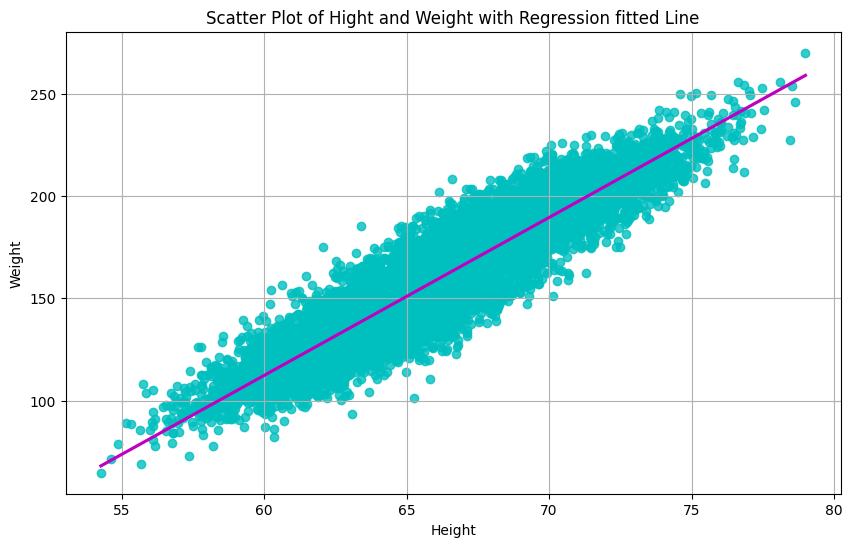

In [ ]:
plt.figure(figsize= (10, 6))
sns.regplot(x = height_of_ind, y = weight_of_ind, scatter_kws={'color' : 'c'}, line_kws={'color' : 'm'})
plt.title('Scatter Plot of Hight and Weight with Regression fitted Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

**Scatter Plot Analysys**

The data points are closely around the regression line.
It indicates a strong and positive relationship between height and weight